### Student Information
Name: 陳恒安

Student ID: 110033637

GitHub ID: andy1124

---

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

# Second Part : 
## - Follow the same process from the [DM2021-Lab1-master Repo] on the new dataset.

## 1. Data Preparation
### 1.1 Load the dataset and import the necessary libraries

In [1]:
### Begin Assignment Here
# Import the necessary libraries
%load_ext autoreload
%autoreload 2
import os
import numpy as np
import pandas as pd
import sklearn

In [2]:
# Load the dataset to dataframe
filepath_dict = { 
                    'amazon': 'amazon_cells_labelled.txt',
                    'imbd'  : 'imdb_labelled.txt',
                    'yelp'  : 'yelp_labelled.txt'         
                }

dfs = []
for source, filepath in filepath_dict.items():
    f = open(filepath, 'r', encoding="utf-8")
    data = f.readlines()
    f.close()
    for line in data:
        line = line.split('\t')
        line[1] = line[1].split('\n')[0]
        line[1] = int(line[1])
        line = tuple(line) + (source,)
        dfs.append(line)
    
df = pd.DataFrame.from_records(dfs, columns=['sentence', 'score', 'source_name'])

### 1.2 Take a look at the dataset

In [3]:
# Take a look at the dataset
df

,sentence,score,source_name
0,So there is no way for me to plug it in here i...,0,amazon
1,"Good case, Excellent value.",1,amazon
2,Great for the jawbone.,1,amazon
3,Tied to charger for conversations lasting more...,0,amazon
4,The mic is great.,1,amazon
...,...,...,...
2995,I think food should have flavor and texture an...,0,yelp
2996,Appetite instantly gone.,0,yelp
2997,Overall I was not impressed and would not go b...,0,yelp
2998,"The whole experience was underwhelming, and I ...",0,yelp


In [4]:
# Print out the length of the dataset. 
len(df)

3000

In [5]:
# Source
source = df['source_name'].drop_duplicates().to_list()
source

['amazon', 'imbd', 'yelp']

In [6]:
# Sentiment scores
scores = df['score'].drop_duplicates().to_list()
scores

[0, 1]

In [7]:
# Query the first 10 records
df[0:10]

,sentence,score,source_name
0,So there is no way for me to plug it in here i...,0,amazon
1,"Good case, Excellent value.",1,amazon
2,Great for the jawbone.,1,amazon
3,Tied to charger for conversations lasting more...,0,amazon
4,The mic is great.,1,amazon
5,I have to jiggle the plug to get it to line up...,0,amazon
6,If you have several dozen or several hundred c...,0,amazon
7,If you are Razr owner...you must have this!,1,amazon
8,"Needless to say, I wasted my money.",0,amazon
9,What a waste of money and time!.,0,amazon


In [8]:
# Query every 10th record in our dataframe and must only contain the first 10 records.
df.iloc[::10, :][0:10]

,sentence,score,source_name
0,So there is no way for me to plug it in here i...,0,amazon
10,And the sound quality is great.,1,amazon
20,I went on Motorola's website and followed all ...,0,amazon
30,"This is a simple little phone to use, but the ...",0,amazon
40,"It has a great camera thats 2MP, and the pics ...",1,amazon
50,Not loud enough and doesn't turn on like it sh...,0,amazon
60,Essentially you can forget Microsoft's tech su...,0,amazon
70,Mic Doesn't work.,0,amazon
80,I wear it everyday and it holds up very well.,1,amazon
90,For a product that costs as much as this one d...,0,amazon


In [9]:
# Fecth records belonging to the score=1 category and query every 10th record.
# Only show the first 5 records.
df.loc[lambda f: f.score == 1].iloc[::10, :][0:5]

,sentence,score,source_name
1,"Good case, Excellent value.",1,amazon
21,I bought this to use with my Kindle Fire and a...,1,amazon
44,Excellent bluetooth headset.,1,amazon
61,I really recommend this faceplates since it lo...,1,amazon
78,"I love this phone , It is very handy and has a...",1,amazon


### 1.3 Adding `sentiment_score` column based on `score` 

In [10]:
# Use LabelEncoder to transform 'provider_name' to 'provider'
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(["negative", "positive"])
list(le.classes_)

['negative', 'positive']

In [11]:
# ['0', '1'] -> ['negative', 'positive']
df['sentiment_score'] = le.inverse_transform(df['score'])
df

,sentence,score,source_name,sentiment_score
0,So there is no way for me to plug it in here i...,0,amazon,negative
1,"Good case, Excellent value.",1,amazon,positive
2,Great for the jawbone.,1,amazon,positive
3,Tied to charger for conversations lasting more...,0,amazon,negative
4,The mic is great.,1,amazon,positive
...,...,...,...,...
2995,I think food should have flavor and texture an...,0,yelp,negative
2996,Appetite instantly gone.,0,yelp,negative
2997,Overall I was not impressed and would not go b...,0,yelp,negative
2998,"The whole experience was underwhelming, and I ...",0,yelp,negative


### 1.4 Adding `source` column based on `source_name` 

In [12]:
le1 = preprocessing.LabelEncoder()
le1.fit(source)
list(le1.classes_)

['amazon', 'imbd', 'yelp']

In [13]:
# ['amazon', 'imdb', 'yelp'] -> ['0', '1', '2']
df['source'] = le1.transform(df['source_name']).tolist()

# Change the order of the dataframe
df = df[['sentence', 'score', 'source', 'sentiment_score', 'source_name']]
df.iloc[::500, :][0:5]

,sentence,score,source,sentiment_score,source_name
0,So there is no way for me to plug it in here i...,0,0,negative,amazon
500,"The bose noise cancelling is amazing, which is...",1,0,positive,amazon
1000,"A very, very, very slow-moving, aimless movie ...",0,1,negative,imbd
1500,The entire audience applauded at the conclusio...,1,1,positive,imbd
2000,Wow... Loved this place.,1,2,positive,yelp


## 2. Data Minging using Pandas
### 2.1 Missing Values

In [14]:
# Check if the dataframe contain missing values
df.isnull()

,sentence,score,source,sentiment_score,source_name
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
2995,False,False,False,False,False
2996,False,False,False,False,False
2997,False,False,False,False,False
2998,False,False,False,False,False


In [15]:
# Use the 'data_mining_helpers' to calculate missing values by column
import helpers.data_mining_helpers as dmh

df.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,source,sentiment_score,source_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0


In [16]:
# Use the 'data_mining_helpers' to calculate missing values by row
df.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2995    (The amoung of missing records is: , 0)
2996    (The amoung of missing records is: , 0)
2997    (The amoung of missing records is: , 0)
2998    (The amoung of missing records is: , 0)
2999    (The amoung of missing records is: , 0)
Length: 3000, dtype: object

### 2.2 Insert some dummy data into the dataframe

#### 2.2.1 'dummy_series'
Insert a 'dummy_series' into the resulting dataframe.

In [17]:
# Insert a 'dummy_series' into the resulting dataframe.
dummy_series = pd.Series(["dummy_record", 1], index = ["sentence", "score"])
dummy_series

sentence    dummy_record
score                  1
dtype: object

In [18]:
# Check if the records was commited into result.
result_with_series = df.append(dummy_series, ignore_index=True)
len(result_with_series)

3001

In [19]:
# Detect that there is a missing value on the resulting dataframe.
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,source,sentiment_score,source_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1,1,1


#### 2.2.2 'dummy_dict'
Append a `dummy_dict` into our current dataframe and try to drop the record with missing value that we just added.

In [20]:
# Dummy record as dictionary format
dummy_dict = [{
                'sentence': 'dummy_record',
                'score'   : 1
               }]

In [21]:
df = df.append(dummy_dict, ignore_index=True)
len(df)

3001

In [22]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,source,sentiment_score,source_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1,1,1


In [23]:
# Drop the record with missing value
df.dropna(inplace=True)

In [24]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,source,sentiment_score,source_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0


In [25]:
len(df)

3000

### 2.3 Dealing with Duplicate Data
Check how many duplicates we have in our current dataset.

In [26]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [27]:
# Check the sum of duplicate records
sum(df.duplicated())

17

In [28]:
# Check for duplicates by only checking the `sentence` attribute.
sum(df.duplicated('sentence'))

17

In [29]:
# Drop the duplicate records 
df.drop_duplicates(keep='first', inplace=True)
len(df)

2983

## 3. Data Preprocessing
### 3.1 Sampling
#### 3.1.1 Sampling

In [30]:
# Using pandas operations to sample
df_sample = df.sample(n = 1000) #random state
len(df_sample)

1000

In [31]:
df_sample[0:4]

,sentence,score,source,sentiment_score,source_name
1212,""" In fact, it's hard to remember that the part...",1,1.0,positive,imbd
1583,It failed to convey the broad sweep of landsca...,0,1.0,negative,imbd
2928,We aren't ones to make a scene at restaurants ...,0,2.0,negative,yelp
822,I have been very satisfied with this cell phon...,1,0.0,positive,amazon


In [32]:
# After the sample function, the 'source' data type become float.
df[0:4]

,sentence,score,source,sentiment_score,source_name
0,So there is no way for me to plug it in here i...,0,0.0,negative,amazon
1,"Good case, Excellent value.",1,0.0,positive,amazon
2,Great for the jawbone.,1,0.0,positive,amazon
3,Tied to charger for conversations lasting more...,0,0.0,negative,amazon


In [33]:
# Covert the 'source' data type back to int.
df[['source']] = df[['source']].astype(int)
df[0:4]

,sentence,score,source,sentiment_score,source_name
0,So there is no way for me to plug it in here i...,0,0,negative,amazon
1,"Good case, Excellent value.",1,0,positive,amazon
2,Great for the jawbone.,1,0,positive,amazon
3,Tied to charger for conversations lasting more...,0,0,negative,amazon


#### 3.1.2 Visualize the distribution of `sentiment score`

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

negative    1493
positive    1490
Name: sentiment_score, dtype: int64


<AxesSubplot:title={'center':'Sentiment score distribution - Original dataset'}>

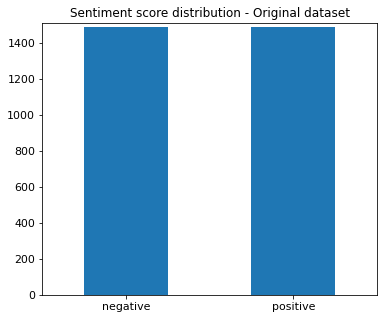

In [35]:
# The distribution of sentiment score in the original dataset.
print(df.sentiment_score.value_counts())

# plot barchart for df
upper_bound = max(df.sentiment_score.value_counts())+20

df.sentiment_score.value_counts().sort_index().plot(
                                                      kind = 'bar',
                                                     title = 'Sentiment score distribution - Original dataset',
                                                      ylim = [0, upper_bound],
                                                       rot = 0, fontsize = 11, figsize = (6,5)
                                                    )

imbd      997
yelp      996
amazon    990
Name: source_name, dtype: int64


<AxesSubplot:title={'center':'Provider distribution - Original dataset'}>

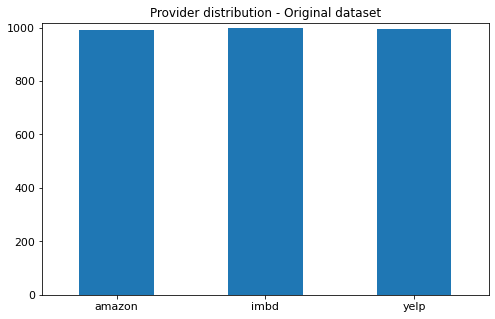

In [36]:
# The distribution of providers in the original dataset.
print(df.source_name.value_counts())

# plot barchart for df
upper_bound = max(df.source_name.value_counts())+20

df.source_name.value_counts().sort_index().plot(
                                                 kind = 'bar',
                                                title = 'Provider distribution - Original dataset',
                                                 ylim = [0, upper_bound],        
                                                  rot = 0, fontsize = 11, figsize = (8,5)
                                                )

negative    503
positive    497
Name: sentiment_score, dtype: int64


<AxesSubplot:title={'center':'Sentiment score distribution - Sample dataset'}>

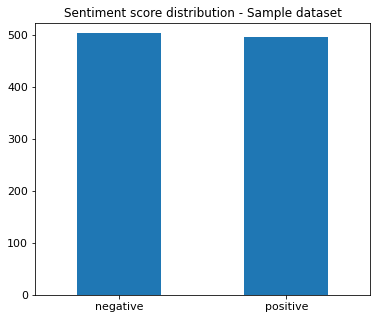

In [37]:
# The distribution of sentiment score in the sample dataset.
print(df_sample.sentiment_score.value_counts())

# plot barchart for df
upper_bound = max(df_sample.sentiment_score.value_counts())+20

df_sample.sentiment_score.value_counts().sort_index().plot(
                                                            kind = 'bar',
                                                           title = 'Sentiment score distribution - Sample dataset',
                                                            ylim = [0, upper_bound],        
                                                             rot = 0, fontsize = 11, figsize = (6,5)
                                                           )

imbd      171
yelp      166
amazon    166
Name: source_name, dtype: int64
imbd      167
amazon    166
yelp      164
Name: source_name, dtype: int64


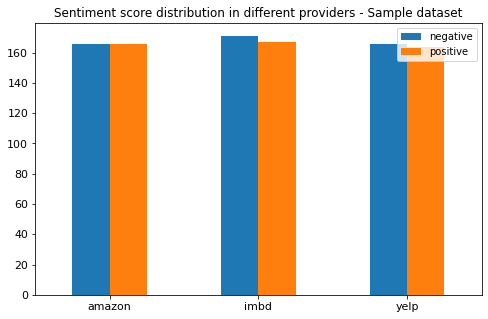

In [38]:
# The distribution of sentiment score and providers in the sample dataset.
df_sample_sc0, df_sample_sc1 = df_sample.query('score == 0').copy(), df_sample.query('score == 1').copy()

print(df_sample_sc0.source_name.value_counts())
print(df_sample_sc1.source_name.value_counts())

df_sample_sc = pd.DataFrame( {  'negative': df_sample_sc0.source_name.value_counts(),
                                'positive': df_sample_sc1.source_name.value_counts() }, )
                                
ax_sample = df_sample_sc.sort_index().plot.bar( title = 'Sentiment score distribution in different providers - Sample dataset',
                                                  rot = 0, fontsize = 11, figsize = (8,5))


<AxesSubplot:title={'center':'Sentiment score distribution'}>

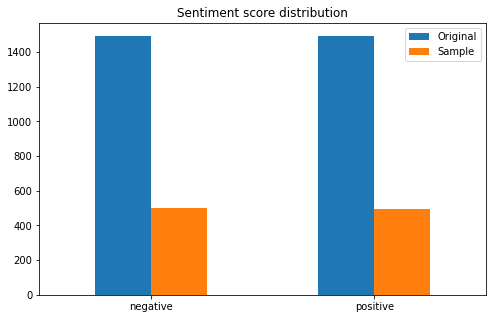

In [39]:
# Side-by-side comparison of the sentiment score distribution between the two datasets
upper_bound = max(df.sentiment_score.value_counts())+20

df_sc_plot = pd.concat([df.sentiment_score.value_counts(), df_sample.sentiment_score.value_counts()],
                        axis = 1, sort = False)

df_sc_plot.columns = ["Original", "Sample"]
df_sc_plot.plot(kind = "bar", title = 'Sentiment score distribution', figsize = (8,5), rot = 0)

### 3.2 Feature Creation
In feature creation we are looking at creating new interesting and useful features from the original datase.

In [40]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pigki\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
# Create some features from the `sentence` field
df['unigrams'] = df['sentence'].apply(lambda x: dmh.tokenize_text(x))
df[0:4]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [42]:
df[0:4]

,sentence,score,source,sentiment_score,source_name,unigrams
0,So there is no way for me to plug it in here i...,0,0,negative,amazon,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,0,positive,amazon,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,0,positive,amazon,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,0,negative,amazon,"[Tied, to, charger, for, conversations, lastin..."


In [43]:
list(df[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

### 3.3 Feature subset selection
Generate a document-term matrix from the original dataset.

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

# Transorfm the sentence into a term-sentence matrix 
# Produce the word frequency vector for each document
count_vect = CountVectorizer()
df_counts  = count_vect.fit_transform(df.sentence)

analyze = count_vect.build_analyzer()
analyze("Hello World!")

['hello', 'world']

In [45]:
# Analyze the first record of our dataframe with the new analyzer we have just built.
analyze(" ".join(list(df[:1].sentence)))

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [46]:
# We can check the shape of this matrix by:
df_counts.shape

(2983, 5155)

In [47]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17'],
      dtype=object)

In [48]:
df[0:5]

,sentence,score,source,sentiment_score,source_name,unigrams
0,So there is no way for me to plug it in here i...,0,0,negative,amazon,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,0,positive,amazon,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,0,positive,amazon,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,0,negative,amazon,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,0,positive,amazon,"[The, mic, is, great, .]"


In [49]:
# Convert sparse array to normal array
df_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [50]:
# Verify the 1 in the forth record represent.
index = 0
for i in range(100):
    if df_counts[3,i] >= 1 : index = i
count_vect.get_feature_names_out()[index]

'45'

In [51]:
# Use the vectorizer to generate word frequency vector
count_vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [52]:
count_vect.transform(['00 Something completely new.']).toarray()

array([[1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [53]:
# First twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_x

['term_00',
 'term_10',
 'term_100',
 'term_11',
 'term_12',
 'term_13',
 'term_15',
 'term_15g',
 'term_15pm',
 'term_17',
 'term_18',
 'term_18th',
 'term_1928',
 'term_1947',
 'term_1948',
 'term_1949',
 'term_1971',
 'term_1973',
 'term_1979',
 'term_1980']

In [54]:
# Obtain document index
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:20]]
plot_z = df_counts[0:20, 0:20].toarray()

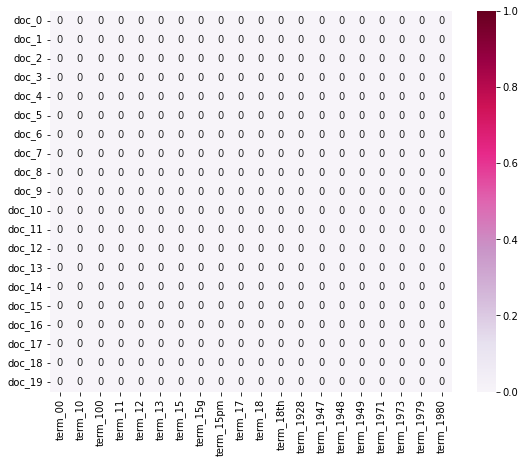

In [55]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize = (9, 7))
ax = sns.heatmap(df_todraw, cmap="PuRd", 
                 vmin=0, vmax=1, annot=True)

From the plot above, we can see that the first twenty sentences don't have any feature in the first twenty features. So I modify the plot by the following code.
First, I covert `df_counts` into DataFrame to get the number of times the features appears.
The top 20 most frequently appearing features are selected as the x-axis, and the first 20 sentences are selected as the y-axis.

In [56]:
# Answer here
# Covert `df_counts` into DataFrame to get the number of times the features appears.
df_plot2 = pd.DataFrame(df_counts.toarray())
counts_sum = df_plot2.sum()
df_plot2 = df_plot2[counts_sum.sort_values(ascending=False).index[:]]
idx_list = list(df_plot2.columns)

df_plot2

,4531,216,2432,2427,4609,4558,3097,4968,2314,1829,...,2208,2211,2212,2213,2214,2216,2218,2219,2221,5154
0,1,0,1,1,1,0,0,0,2,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2978,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2979,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2980,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2981,1,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


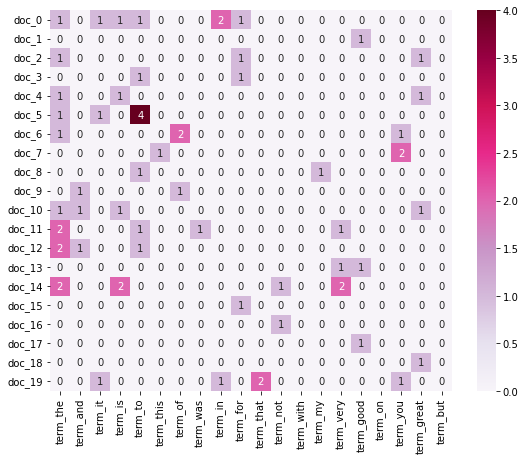

In [57]:

# Select the top 20 most frequently appearing features as the x-axis.
# Select First 20 sentences as the y-axis.

temp_x = count_vect.get_feature_names_out()[idx_list[0:20]]
temp_xidx = idx_list[0:20]
temp_y = list(range(0,20))

plot_x1 = ["term_"+str(i) for i in temp_x]
plot_y1 = ["doc_"+ str(i) for i in temp_y]
plot_z1 = np.ones((20,20))

for i in range(len(plot_z1)):
    for j, k in zip(range(len(plot_z1[i])), temp_xidx):
        plot_z1[i][j] = df_counts[i,k]

df_todraw1 = pd.DataFrame(plot_z1, columns = plot_x1, index = plot_y1)
plt.subplots(figsize = (9, 7))
ax = sns.heatmap(df_todraw1, cmap="PuRd",
                 vmin=0, vmax=4, annot=True)

### 3.4 Dimensionality Reduction
Make use of Principal Component Analysis (PCA) to efficeintly reduce the dimensions of our data.

In [58]:
from sklearn.decomposition import PCA

df_reduced = PCA(n_components = 2).fit_transform(df_counts.toarray())
df_reduced.shape

(2983, 2)

In [59]:
scores

[0, 1]

Reduce the dimension to 2, and plot the result.

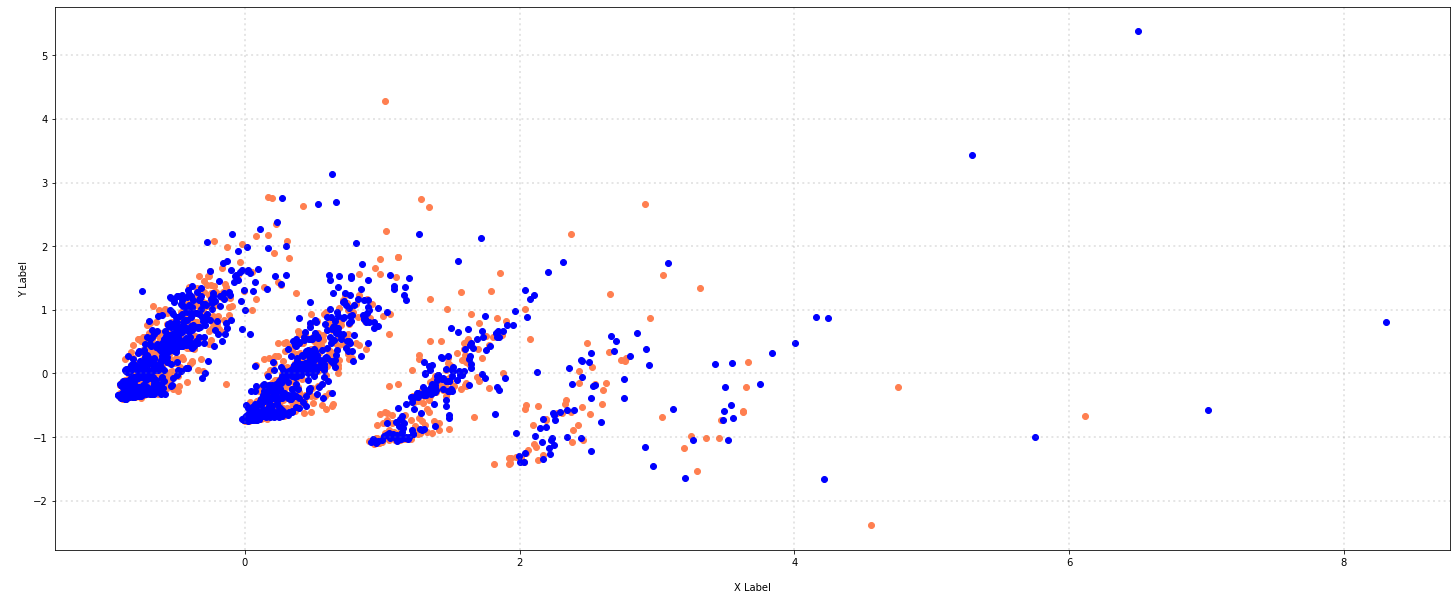

In [60]:
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax  = fig.subplots()

for c, score in zip(col, scores):
    xs = df_reduced[df['score'] == score].T[0]
    ys = df_reduced[df['score'] == score].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

Reduce the dimension to 3, and plot the result use 3-D plot. Use at 3 different camera position to check the result.

In [61]:
df_reduced1 = PCA(n_components = 3).fit_transform(df_counts.toarray())
df_reduced1.shape
col = ['coral', 'blue', 'black', 'm']

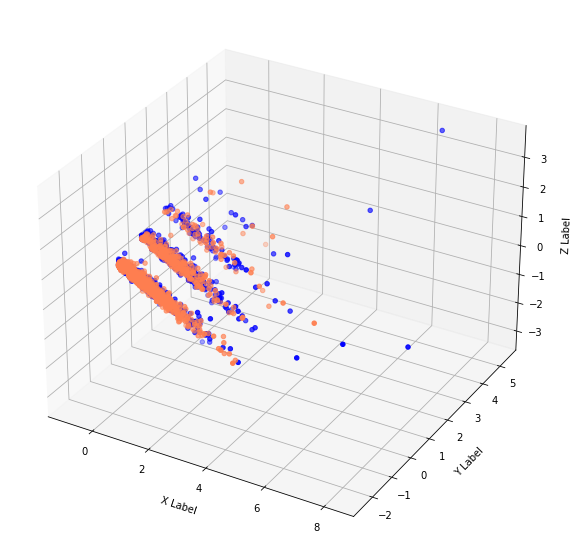

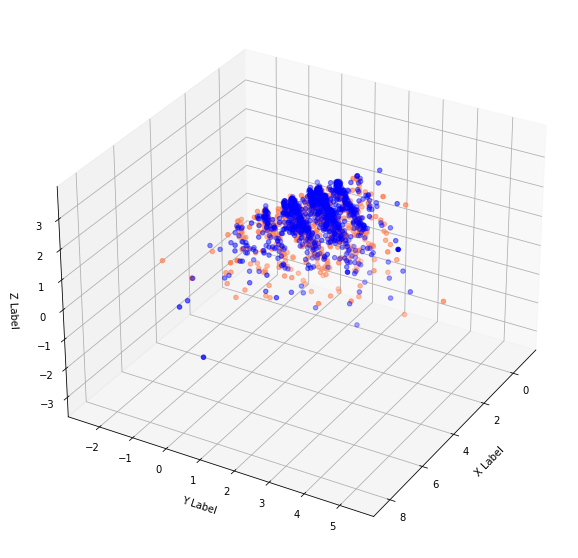

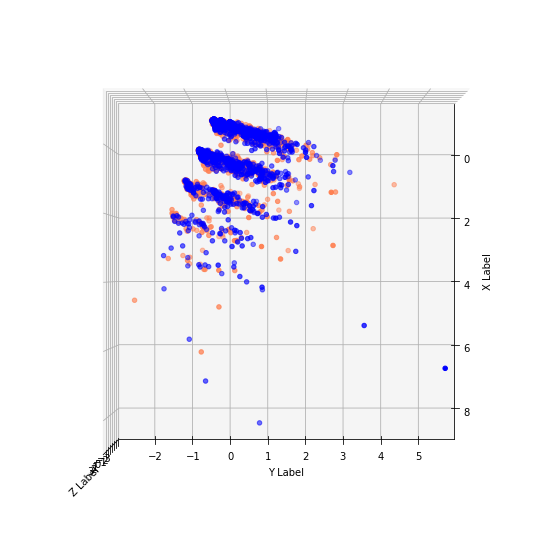

In [62]:
# Plot angle 1
fig = plt.figure(figsize = (25,10))
ax  = fig.add_subplot(projection='3d')

for c, score in zip(col, scores):
    xs = df_reduced1[df['score'] == score].T[0]
    ys = df_reduced1[df['score'] == score].T[1]
    zs = df_reduced1[df['score'] == score].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()


# Plot angle 2
fig = plt.figure(figsize = (25,10))
ax  = fig.add_subplot(projection='3d')

for c, score in zip(col, scores):
    xs = df_reduced1[df['score'] == score].T[0]
    ys = df_reduced1[df['score'] == score].T[1]
    zs = df_reduced1[df['score'] == score].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(30, 30)

plt.show()


# Plot angle 3
fig = plt.figure(figsize = (25,10))
ax  = fig.add_subplot(projection='3d')

for c, score in zip(col, scores):
    xs = df_reduced1[df['score'] == score].T[0]
    ys = df_reduced1[df['score'] == score].T[1]
    zs = df_reduced1[df['score'] == score].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(90, 0)

plt.show()

After checking the results from three different angles, we can see the power of PCA. Since the results show that PCA perform effectively, we can find out the correlation among the features using PCA analysis.

### 3.5 Atrribute Transformation / Aggregation
Generate a simple distribution of the words found in all the entire set of sentences.

In [63]:
# Compute these frequencies for each term in all documents.
term_frequencies = []

for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))

term_frequencies = np.asarray(df_counts.sum(axis=0))[0]
term_frequencies[0]

1

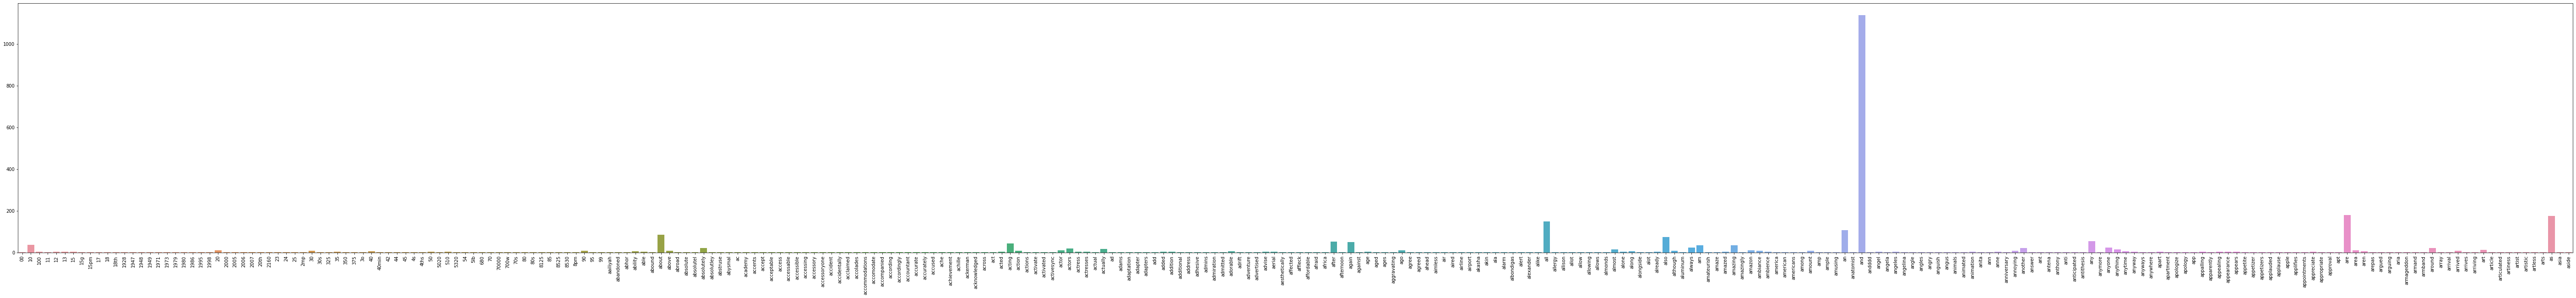

In [64]:
plt.subplots(figsize=(100, 10))

g = sns.barplot(x=count_vect.get_feature_names_out()[:300], y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [65]:
import plotly.express as px

fig = px.bar(
              x=count_vect.get_feature_names_out()[:300], y=term_frequencies[:300],
              labels = {'x':'Feature names', 'y':'Frequencies'},
              title  = "Distribution of Features",
              category_orders = count_vect.get_feature_names_out()[:300]
            )
fig.show()

From the two graphs above, it is difficult to see the relationship between features and frequencies because the number of features is too large. Rather than using all the features to plot the feature distribution, I only use the features which have the frequency more than 200 to redraw the distribution and the results are displayed below.

In [66]:
# Use the frequency threshold (200) to filter out the feature with lower frequiencies.
temp_x1 = []
temp_y1 = []

for i in range(len(term_frequencies)):
    if term_frequencies[i]>200:
        temp_x1.append(count_vect.get_feature_names_out()[i])
        temp_y1.append(term_frequencies[i])

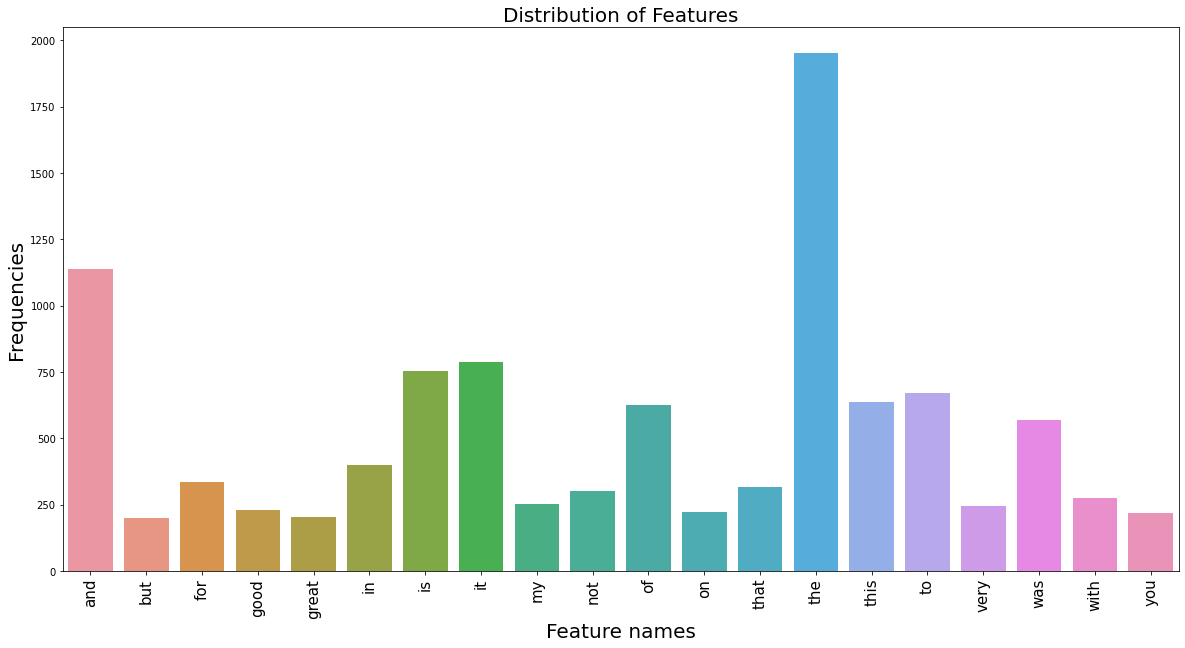

In [67]:
# Plot the distribution using higher frequency features.
plt.subplots(figsize=(20, 10))

g = sns.barplot(x=temp_x1, y=temp_y1)
g.set_title('Distribution of Features', fontsize=20)
g.set_xlabel('Feature names', fontsize=20)
g.set_ylabel('Frequencies', fontsize=20)
g.set_xticklabels(temp_x1, rotation = 90, fontsize=15);

In [68]:
# Plot the distribution using higher frequency features.
fig = px.bar(
             x=temp_x1, y=temp_y1,
             labels = {'x':'Feature names', 'y':'Frequencies'},
             title  = "Distribution of Features",
             category_orders = temp_x1
            )
fig.update_traces(texttemplate=temp_y1, textposition='outside')
fig.show()

In [69]:
# Plot the distribution using top 20 most frequently appearing features.
px_x = count_vect.get_feature_names_out()[idx_list[0:20]]
px_y = term_frequencies[idx_list[0:20]]

fig = px.bar(
             x=px_x, y=px_y, 
             labels = {'x':'Feature names', 'y':'Frequencies'},
             title  = "Top 20 most frequently appearing features",
             category_orders = px_x)
fig.update_traces(texttemplate=list(px_y), textposition='outside')
fig.show()

In [70]:
# Use the top 300 most frequently appearing features to plot the long tail histogram.
freq_sort = term_frequencies[idx_list[0:300]]

fig = px.bar(
             y=freq_sort.tolist()[0:300],
             labels = {'x':'Features', 'y':'Frequencies'},
             title  = "Long tail histogram"
            )
fig.show()

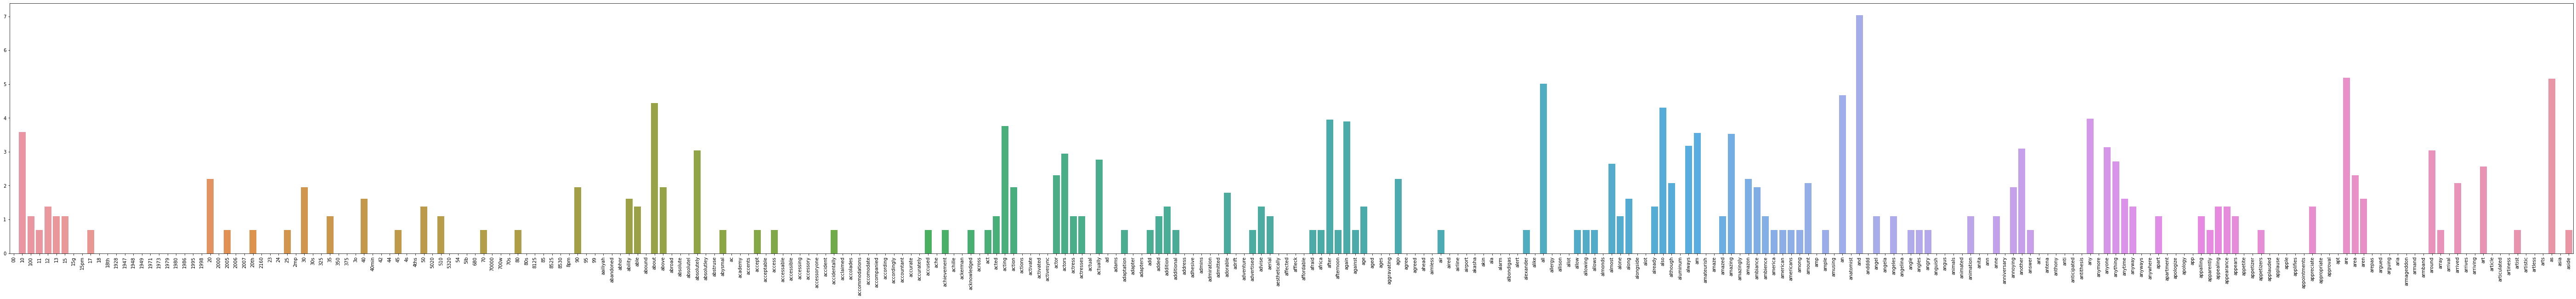

In [71]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### 3.6 Discretization and Binarization

In [72]:
from sklearn import metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()
mlb.fit(df.source_name)

LabelBinarizer()

In [73]:
mlb.classes_

array(['amazon', 'imbd', 'yelp'], dtype='<U6')

In [74]:
df['bin_source'] = mlb.transform(df['source_name']).tolist()
df[0:10]

,sentence,score,source,sentiment_score,source_name,unigrams,bin_source
0,So there is no way for me to plug it in here i...,0,0,negative,amazon,"[So, there, is, no, way, for, me, to, plug, it...","[1, 0, 0]"
1,"Good case, Excellent value.",1,0,positive,amazon,"[Good, case, ,, Excellent, value, .]","[1, 0, 0]"
2,Great for the jawbone.,1,0,positive,amazon,"[Great, for, the, jawbone, .]","[1, 0, 0]"
3,Tied to charger for conversations lasting more...,0,0,negative,amazon,"[Tied, to, charger, for, conversations, lastin...","[1, 0, 0]"
4,The mic is great.,1,0,positive,amazon,"[The, mic, is, great, .]","[1, 0, 0]"
5,I have to jiggle the plug to get it to line up...,0,0,negative,amazon,"[I, have, to, jiggle, the, plug, to, get, it, ...","[1, 0, 0]"
6,If you have several dozen or several hundred c...,0,0,negative,amazon,"[If, you, have, several, dozen, or, several, h...","[1, 0, 0]"
7,If you are Razr owner...you must have this!,1,0,positive,amazon,"[If, you, are, Razr, owner, ..., you, must, ha...","[1, 0, 0]"
8,"Needless to say, I wasted my money.",0,0,negative,amazon,"[Needless, to, say, ,, I, wasted, my, money, .]","[1, 0, 0]"
9,What a waste of money and time!.,0,0,negative,amazon,"[What, a, waste, of, money, and, time, !, .]","[1, 0, 0]"


## 4. Data Exploration

In [75]:
# We retrieve 2 sentences for a random record, here, indexed at 50 and 100
document_to_transform_1 = []
random_record_1 = df.iloc[50]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df.iloc[100]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df.iloc[150]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

In [76]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["Not loud enough and doesn't turn on like it should."]
['Integrated seamlessly with the Motorola RAZR phone.']
['I Was Hoping for More.']


In [77]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [78]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


# Third Part : 
## - Generate meaningful new data visualizations.
## - Generate TF-IDF features from the tokens of each text.
## - Build two seperate Naive Bayes classifier using both the TF-IDF features and word frequency features.

## 1. New Data Visualization
Define useless words such as 'the' and 'and', which don't effect sentiment.

### 1.1 WordCloud
#### 1.1.1 WordCloud using all data
Visualizing sentence data as a wordcloud is to analyze the text and retrieve the frequency of each word within the text. We visualize all the sentences as a wordcloud.

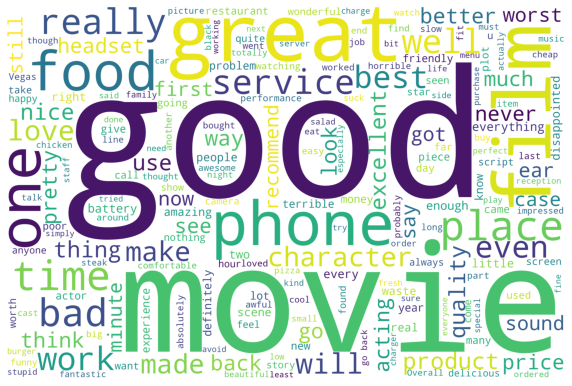

In [79]:
# Visualize all the sentences as a wordcloud
from wordcloud import WordCloud

wordcloud_df = WordCloud(width=3000,height=2000,background_color='white').generate(' '.join(df['sentence']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_df)
plt.axis("off")
plt.show()

#### 1.1.2 WordCloud using different source data
Create three dataframe based on three different source (data providers). Visualize sentence data from different source (data providers) as a wordcloud and compare the difference between them.

In [80]:
df_amazon = df.query('source == 0').copy()
df_imbd   = df.query('source == 1').copy()
df_yelp   = df.query('source == 2').copy()

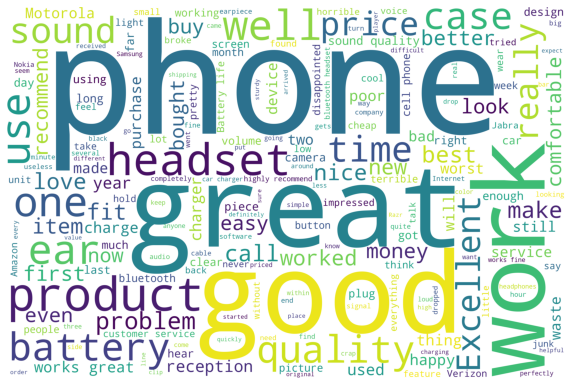

In [81]:
# Amazon wordcloud
wordcloud_df = WordCloud(width=3000,height=2000,background_color='white').generate(' '.join(df_amazon['sentence']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_df)
plt.axis("off")
plt.show()

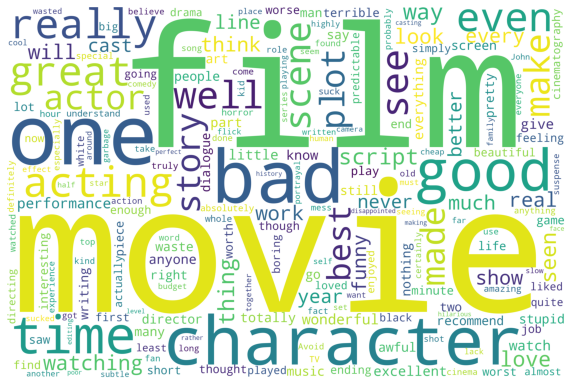

In [82]:
# imbd wordcloud
wordcloud_df = WordCloud(width=3000,height=2000,background_color='white').generate(' '.join(df_imbd['sentence']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_df)
plt.axis("off")
plt.show()

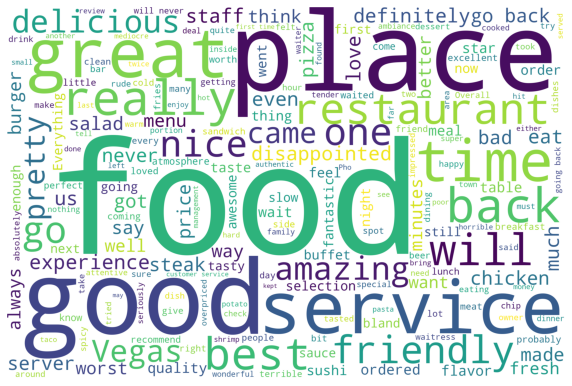

In [83]:
# yelp wordcloud
wordcloud_df = WordCloud(width=3000,height=2000,background_color='white').generate(' '.join(df_yelp['sentence']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_df)
plt.axis("off")
plt.show()

From the above results, we can see that the wordcloud corresponding to the sentence data collected by different companies is also different. For example, in the data collected by Amazon, words such as 'phone', 'product' and so on accounted for the majority. In the data collected by imbd, words such as 'movie', 'film' accounted for the majority. 

#### 1.1.3 WordCloud using different sentiment data
Create two dataframe based on the sentiment score (positive, negative). Visualize sentence data as a wordcloud and compare the difference between positive and negative sentences.

In [84]:
df_negative = df.query('score == 0').copy()
df_positive = df.query('score == 1').copy()
df_negative.reset_index(drop=True, inplace=True)
df_positive.reset_index(drop=True, inplace=True)

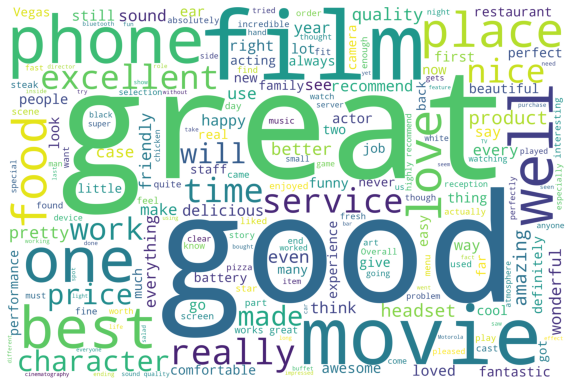

In [85]:
# Visualize all the sentences which have positive sentiment score as a wordcloud
wordcloud_df = WordCloud(width=3000,height=2000,background_color='white').generate(' '.join(df_positive['sentence']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_df)
plt.axis("off")
plt.show()

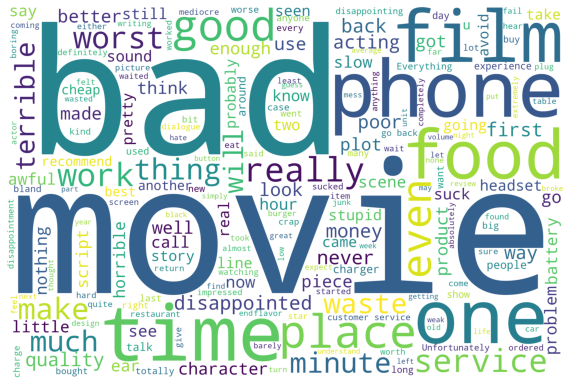

In [86]:
# Visualize all the sentences which have negative sentiment score as a wordcloud
wordcloud_df = WordCloud(width=3000,height=2000,background_color='white').generate(' '.join(df_negative['sentence']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_df)
plt.axis("off")
plt.show()

From the above results, we can clearly see the difference between the positive and negative sentences. In the wordcloud of the positive sentences, words such as 'great' and 'good' accounted for the majority. On the other hand, the word 'bad' frequently appear in the negative sentences.

### 1.2 Pie Chart
Visualizing both positive and negative sentences as pie chart. 

In [87]:
# Define the useless words such as 'the' and 'and', which usually don't affect the sentiment score.
useless_word = [ 
                  'the',   'and',    'or',    'is',   'it',  'this',      'of',    'he',    'by',  'when',
                  'was',    'in',   'for',  'with',  'its',    'me',      'to',    'be',  'were',  'will',
                 'that',   'you',    'my', 'yours',   'so',   'but',      'as',  'from',    'we',  'they',
                  'she',    'on',   'are',   'had',   'an',     'a',    'have',    'at',    'if', 'their',
                  'has',  'your',   'his',   'her',  'can', 'would',     'did',  'also', 'about',  'what',
                  'how', 'while', 'hence', 'those', 'didn', 'doesn', 'because', 'there',  'when',   'don' 
                ]

Calculate the term frequencies based on the positive and negative sentences.

In [88]:
#### POSITIVE ####
# Calculate the term frequencies of positive sentence 
count_vect_p = CountVectorizer()
df_counts_p  = count_vect_p.fit_transform(df_positive.sentence)

term_frequencies_p = []

for j in range(0,df_counts_p.shape[1]):
    term_frequencies_p.append(sum(df_counts_p[:,j].toarray()))

term_frequencies_p = np.asarray(df_counts_p.sum(axis=0))[0]

# Covert `df_counts_p` into DataFrame to get the number of times the features appear and sort dataframe by frequency in descending order
df_plot_p  = pd.DataFrame(df_counts_p.toarray())
df_plot_p  = df_plot_p[df_plot_p.sum().sort_values(ascending=False).index[:]]

# Get the index of the sorted dataframe 
idx_list_p = list(df_plot_p.columns)

#### NEGATIVE ####
# Calculate the term frequencies of negative sentence 
count_vect_n = CountVectorizer()
df_counts_n  = count_vect_n.fit_transform(df_negative.sentence)

term_frequencies_n = []

for j in range(0,df_counts_n.shape[1]):
    term_frequencies_n.append(sum(df_counts_n[:,j].toarray()))

term_frequencies_n = np.asarray(df_counts_n.sum(axis=0))[0]


# Covert `df_counts_n` into DataFrame to get the number of times the features appear and sort dataframe by frequency in descending order
df_plot_n  = pd.DataFrame(df_counts_n.toarray())
df_plot_n  = df_plot_n[df_plot_n.sum().sort_values(ascending=False).index[:]]

# Get the index of the sorted dataframe 
idx_list_n = list(df_plot_n.columns)


Plot two pie charts using top 30 most frequently occurring words in positive and negative sentences.

In [89]:
# Plot pie chart using top 30 Frequent Words in Positive Sentence
df_pie_p = pd.DataFrame( data = { 'name': count_vect_p.get_feature_names_out()[idx_list_p[:]],
                                  'freq': term_frequencies_p[idx_list_p[:]] } )

df_pie_p = df_pie_p[~df_pie_p['name'].isin(useless_word)]

fig = px.pie(df_pie_p[0:30], values='freq', names='name',
             title='Top 30 most frequently occurring words in positive sentence')
fig.update_traces(textposition='inside', textfont_size=14, textinfo='percent+label')
fig.show()


In [90]:
# Plot pie chart using top 30 Frequent Words in Negative Sentence
df_pie_n = pd.DataFrame( data = { 'name': count_vect_n.get_feature_names_out()[idx_list_n[:]],
                                  'freq': term_frequencies_n[idx_list_n[:]] } )

df_pie_n = df_pie_n[~df_pie_n['name'].isin(useless_word)]

fig = px.pie(df_pie_n[0:30], values='freq', names='name',
             title='Top 30 most frequently occurring words in negative sentence')
fig.update_traces(textposition='inside', textfont_size=14, textinfo='percent+label')
fig.show()

### 1.3 Natural Language Processing (NLP)
Here I use the POS (Part of Speech) tagging to visualize a sentence.

In [91]:
import spacy
from spacy import displacy

nlp=spacy.load('en_core_web_sm')
doc=nlp(df['sentence'][0])
displacy.render(doc, style='dep',options={'distance':100})

## 2. Naive Bayes classifier.
### 2.1 TF-IDF Features/ Word Frequency Features

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF features
vectorizer = TfidfVectorizer(smooth_idf=True)
x = vectorizer.fit_transform(df['sentence'])
tfidf = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names_out())
tfidf

,00,10,100,11,12,13,15,15g,15pm,17,...,yucky,yukon,yum,yummy,yun,z500a,zero,zillion,zombie,zombiez
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2979,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2980,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2981,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
# Word frequency features
wf = pd.DataFrame(df_counts.toarray(), columns=count_vect.get_feature_names_out())
wf

,00,10,100,11,12,13,15,15g,15pm,17,...,yucky,yukon,yum,yummy,yun,z500a,zero,zillion,zombie,zombiez
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2978,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2979,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2980,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2981,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2.2 Multinomial Naive Bayes classifier
Use 75% of the dataset for training and 25% for testing.

In [94]:
split = int(0.75*len(df.index))
split

2237

Build the multinomial Naive Bayes classifiers using both TF-IDF features and word frequency fretures.

In [95]:
# Use the TF-IDF features to build the multinomial Naive Bayes classifier.
from sklearn.naive_bayes import MultinomialNB
print("Multinomial Naive Bayes classifier")

MNB_tfidf = MultinomialNB()
MNB_tfidf.fit(tfidf[:split], df['score'][:split])

tfidf_pred   = MNB_tfidf.predict(tfidf[:split])
tfidf_target = np.array(df['score'][:split])
tfidf_acc    = np.sum(tfidf_pred == tfidf_target )/len(df['score'][:split])
print("TD-IDF training accuracy : ", round(tfidf_acc, 3))

tfidf_pred   = MNB_tfidf.predict(tfidf[split:])
tfidf_target = np.array(df['score'][split:])
tfidf_acc    = np.sum(tfidf_pred == tfidf_target )/len(df['score'][split:])
print("TD-IDF testing  accuracy : ", round(tfidf_acc, 3))


# Use the word frequency features to build the multinomial Naive Bayes classifier.
MNB_wf = MultinomialNB()
MNB_wf.fit(wf[:split], df['score'][:split])

wf_pred   = MNB_wf.predict(wf[:split])
wf_target = np.array(df['score'][:split])
wf_acc    = np.sum(wf_pred == wf_target)/len(df['score'][:split])
print("Word Frequency training accuracy : ", round(wf_acc, 3))

wf_pred   = MNB_wf.predict(wf[split:])
wf_target = np.array(df['score'][split:])
wf_acc    = np.sum(wf_pred == wf_target)/len(df['score'][split:])
print("Word Frequency testing  accuracy : ", round(wf_acc, 3))

Multinomial Naive Bayes classifier
TD-IDF training accuracy :  0.961
TD-IDF testing  accuracy :  0.819
Word Frequency training accuracy :  0.956
Word Frequency testing  accuracy :  0.814


### 2.3 Gaussian Naive Bayes classifier
Build the Gaussian Naive Bayes classifiers using both TF-IDF features and word frequency fretures.

In [96]:
# Use the TF-IDF features to build the Gaussian Naive Bayes classifier.
from sklearn.naive_bayes import GaussianNB
print("Gaussian Naive Bayes classifier")

GNB_tfidf = GaussianNB()
GNB_tfidf.fit(tfidf[:split], df['score'][:split])

tfidf_pred   = GNB_tfidf.predict(tfidf[:split])
tfidf_target = np.array(df['score'][:split])
tfidf_acc    = np.sum(tfidf_pred == tfidf_target )/len(df['score'][:split])
print("TD-IDF training accuracy : ", round(tfidf_acc, 3))

tfidf_pred   = GNB_tfidf.predict(tfidf[split:])
tfidf_target = np.array(df['score'][split:])
tfidf_acc    = np.sum(tfidf_pred == tfidf_target )/len(df['score'][split:])
print("TD-IDF testing  accuracy : ", round(tfidf_acc, 3))


# Use the word frequency features to build the multinomial Naive Bayes classifier.
GNB_wf = GaussianNB()
GNB_wf.fit(wf[:split], df['score'][:split])

wf_pred   = GNB_wf.predict(wf[:split])
wf_target = np.array(df['score'][:split])
wf_acc    = np.sum(wf_pred == wf_target)/len(df['score'][:split])
print("Word Frequency training accuracy : ", round(wf_acc, 3))

wf_pred   = GNB_wf.predict(wf[split:])
wf_target = np.array(df['score'][split:])
wf_acc    = np.sum(wf_pred == wf_target)/len(df['score'][split:])
print("Word Frequency testing  accuracy : ", round(wf_acc, 3))

Gaussian Naive Bayes classifier
TD-IDF training accuracy :  0.908
TD-IDF testing  accuracy :  0.661
Word Frequency training accuracy :  0.868
Word Frequency testing  accuracy :  0.658


### 2.4 Bernoulli Naive Bayes classifier
Build the Gaussian Naive Bayes classifiers using both TF-IDF features and word frequency fretures.

In [97]:
# Use the TF-IDF features to build the Bernoulli Naive Bayes classifier.
from sklearn.naive_bayes import BernoulliNB
print("Bernoulli Naive Bayes classifier")

BNB_tfidf = BernoulliNB()
BNB_tfidf.fit(tfidf[:split], df['score'][:split])

tfidf_pred   = BNB_tfidf.predict(tfidf[:split])
tfidf_target = np.array(df['score'][:split])
tfidf_acc    = np.sum(tfidf_pred == tfidf_target)/len(df['score'][:split])
print("TD-IDF training accuracy : ", round(tfidf_acc, 3))

tfidf_pred   = BNB_tfidf.predict(tfidf[split:])
tfidf_target = np.array(df['score'][split:])
tfidf_acc    = np.sum(tfidf_pred == tfidf_target)/len(df['score'][split:])
print("TD-IDF testing  accuracy : ", round(tfidf_acc, 3))


# Use the word frequency features to build the multinomial Naive Bayes classifier.
BNB_wf = BernoulliNB()
BNB_wf.fit(wf[:split], df['score'][:split])

wf_pred   = BNB_wf.predict(wf[:split])
wf_target = np.array(df['score'][:split])
wf_acc    = abs((wf_pred == wf_target).sum())/len(df['score'][:split])
print("Word Frequency training accuracy : ", round(wf_acc, 3))

wf_pred   = BNB_wf.predict(wf[split:])
wf_target = np.array(df['score'][split:])
wf_acc    = abs((wf_pred == wf_target).sum())/len(df['score'][split:])
print("Word Frequency testing  accuracy : ", round(wf_acc, 3))

Bernoulli Naive Bayes classifier
TD-IDF training accuracy :  0.957
TD-IDF testing  accuracy :  0.815
Word Frequency training accuracy :  0.957
Word Frequency testing  accuracy :  0.815


Although I know that multinomial Naive Bayes classifier is very efficient in natural language processing, I still want to try on other Naive Bayes classifier(Bernoulli, Gaussian) to compare the accuracy between classifiers.
From the results above, we can see that the classifiers trained on TF-IDF features usually get higher accuracy than the classifiers trained on word frequency features. Therefore, we can summarize that TF-IDF features are more powerful than word frequency features when dealing with the sentence or document analysis.

# Fourth Part : 
## - How to improve the Data preprocessing for the specific datasets.

 1. ### In [DM2021-Lab1-master Repo] section 5.5 Atrribute Transformation / Aggregation, we plot the distribution of features using all the features without filtering, which make us hardly understand the relationship between each feature, since the total number of features is up to 35788. Therefore, I use the frequency threshold to filter out the feature with lower frequiency.,and redraw the distribution of features plot using the filtered features, which make it easier for us to observe.


 2. ### In [DM2021-Lab1-master Repo] section 5.6 Discretization and Binarization, we can use `X['bin_category'] = mlb.fit_transform(X['category']).tolist()` instead of `mlb.fit(X.category)` + `X['bin_category'] = mlb.transform(X['category']).tolist()`, it may perform more efficiently.


 3. ### We call the `count_vect.get_feature_names()` function lots of times in [DM2021-Lab1-master Repo], we should make a list or array to store these things instead of calling function every time. 